### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

**Independent variable: The condition of the words (whether they are congruent or incongruent).** 

**Dependent variable: The time it takes to name the ink colors.**

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**H0: There is no significant difference in the population average amount of time it takes to state the colors of the words in a congruent or incongruent condition.**

**H1: There is significant difference in the population average amount of time it takes to state the colors of the words in a congruent or incongruent condition.**

**The hypotheses can be notated as below:**
$$ H_0: \mu_{con} = \mu_{inc}$$
$$ H_1: \mu_{con} \neq \mu_{inc}$$

**In this case, $\mu_{con}$ is the average time for the population to state the colors of the words in a congruent condition. While $\mu_{inc}$ represents the average time for the population to state the colors of the words in an incongruent condition.**

**In order to determine if these two sets of data are significantly different from each other, we can perform a two-tail dependent t-test.**

**The reasons of choosing a t-test are:**

+ We only have a small sample that's less than 30 participants.
+ We don't know the population standard deviation.

**The reasons of choosing a two-tail dependent test are:**

+ We are only interested in learning if there's a difference between the two dataset as stated in the alternative hypothesis. So the test is two-tailed.
+ Each participant completed each of the condition so the test should be dependent.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Perform the analysis here
import pandas as pd
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**The dataset has two conlumn, each with 24 entries. The mean of the `Congruent` group is 14.05 and the mean of the `Incongruent` group is 22.02. The standard deviations of the two groups are 3.56 and 4.80.**

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

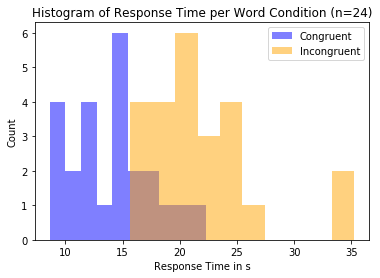

In [4]:
# Build the visualizations here
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['Congruent'],color='blue',alpha=0.5, label='Congruent')
plt.hist(df['Incongruent'],color='orange',alpha=0.5, label='Incongruent')
plt.title('Histogram of Response Time per Word Condition (n=24)')
plt.xlabel('Response Time in s')
plt.ylabel('Count')
plt.legend();

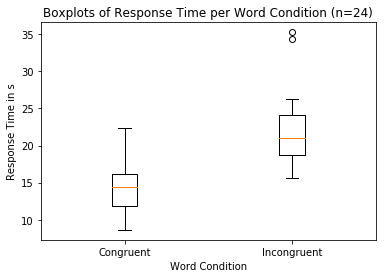

In [5]:
labels=['Congruent','Incongruent']
x = [df['Congruent'],df['Incongruent']]
plt.boxplot(x,labels=labels)
plt.title('Boxplots of Response Time per Word Condition (n=24)')
plt.xlabel('Word Condition')
plt.ylabel('Response Time in s');

**From the plots above, we can see that most participants take less time in the `Congruent` test than in the `Incongruent` test. The most common time it takes to finish the tests are 15 seconds for the `Congruent` list and 20 seconds for the `Incongruent` list. We can also see that there's an outlier in the `Incongruent` results that is much longer time than the others.**

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [9]:
# Perform the statistical test here
from scipy.stats import ttest_rel
from scipy.stats import t

# Calculate t-statistic and p-value
print(ttest_rel(df['Congruent'],df['Incongruent']))
# Calculate t-critical for a two-tail test with a sample size of 24
print(t.ppf(1-0.025, 24))

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)
2.06389856163


**According to the test results, the t-statistic is -8.02 and the p-value is close to 0. Given a 95% confidence level, the t-statistic's value has passed the lower bound of t-critical value (-2.06), and the p-value is smaller than the confidence level (0.25). Therefore  we have enough evidence to reject the null hypothesis. This means that the time it takes to name the ink colors in congruent and incongruent lists are significantly different. It matches up with our expectations and observations from the plots.**